In [1]:
# import the necessary libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv(r'C:/Users/chand/Downloads/606/varzos.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58985 entries, 0 to 58984
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      58985 non-null  int64  
 1   STATE         58985 non-null  object 
 2   AGE_YRS       58985 non-null  float64
 3   SEX           58985 non-null  int64  
 4   SYMPTOM_TEXT  58985 non-null  object 
 5   DIED          58985 non-null  int64  
 6   L_THREAT      58985 non-null  int64  
 7   HOSPITAL      58985 non-null  int64  
 8   HOSPDAYS      58985 non-null  float64
 9   DISABLE       58985 non-null  int64  
 10  RECOVD        58985 non-null  int64  
 11  VAX_DATE      58985 non-null  object 
 12  ONSET_DATE    58985 non-null  object 
 13  NUMDAYS       58985 non-null  int64  
 14  OTHER_MEDS    58985 non-null  object 
 15  CUR_ILL       58985 non-null  object 
 16  HISTORY       58985 non-null  object 
 17  BIRTH_DEFECT  58985 non-null  int64  
 18  ALLERGIES     58985 non-nu

In [4]:
df.describe()

VAERS_ID       AGE_YRS           SEX          DIED      L_THREAT  \
count  5.898500e+04  58985.000000  58985.000000  58985.000000  58985.000000   
mean   1.253153e+06     63.939307      0.280427      0.001695      0.008782   
std    7.118668e+05      9.196833      0.461645      0.041140      0.093300   
min    7.012530e+05      5.000000      0.000000      0.000000      0.000000   
25%    7.986960e+05     57.000000      0.000000      0.000000      0.000000   
50%    8.553700e+05     63.000000      0.000000      0.000000      0.000000   
75%    1.662442e+06     70.000000      1.000000      0.000000      0.000000   
max    2.793759e+06     90.000000      2.000000      1.000000      1.000000   

           HOSPITAL      HOSPDAYS       DISABLE        RECOVD       NUMDAYS  \
count  58985.000000  58985.000000  58985.000000  58985.000000  58985.000000   
mean       0.035416      0.203035      0.021700      0.819869     20.557108   
std        0.184830      2.255757      0.145705      0.765180    518.885115   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      1.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000    112.000000      1.000000      2.000000  32547.000000   

       BIRTH_DEFECT       SERIOUS  
count  58985.000000  58985.000000  
mean       0.000085      0.089582  
std        0.009207      0.285585  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [5]:
# Check if duplicates have been dropped
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    58495
Name: count, dtype: int64

In [6]:
df.head()

VAERS_ID STATE  AGE_YRS  SEX  \
0    701253    VA     50.0    0   
1    701263    FL     60.0    0   
2    701308    MI     60.0    0   
3    702367    AZ     61.0    0   
4    702367    AZ     61.0    0   

                                        SYMPTOM_TEXT  DIED  L_THREAT  \
0  THE PATIENT GOT THE ZOSTAVAX VACCINE PER PROTO...     0         0   
1  PATIENT REPORTED REDNESS AND SWELLING AT FIRST...     0         0   
2  PATIENT EXPERIENCED LARGE SWELLING IN THE UPPE...     0         0   
3  DEVELOPED SHINGLES YEARS LATER SYMPTOMS RASH A...     0         0   
4  DEVELOPED SHINGLES YEARS LATER SYMPTOMS RASH A...     0         0   

   HOSPITAL  HOSPDAYS  DISABLE  ...  BIRTH_DEFECT                ALLERGIES  \
0         0       0.0        0  ...             0  LINZES TRAMADOL VALTREX   
1         0       0.0        0  ...             0                      NKA   
2         0       0.0        0  ...             0       NO KNOWN ALLERGIES   
3         0       0.0        0  ...             0                   MANGOS   
4         0       0.0        0  ...             0                   MANGOS   

           VAX_MANU                VAX_NAME                    SYMPTOM1  \
0  MERCK & CO. INC.  ZOSTER LIVE (ZOSTAVAX)                  CELLULITIS   
1  MERCK & CO. INC.  ZOSTER LIVE (ZOSTAVAX)                    ERYTHEMA   
2  MERCK & CO. INC.  ZOSTER LIVE (ZOSTAVAX)         INJECTION SITE RASH   
3  MERCK & CO. INC.  ZOSTER LIVE (ZOSTAVAX)          BLOOD COUNT NORMAL   
4  MERCK & CO. INC.  ZOSTER LIVE (ZOSTAVAX)  RENAL FUNCTION TEST NORMAL   

                  SYMPTOM2                    SYMPTOM3  \
0      INJECTION SITE RASH       INJECTION SITE WARMTH   
1                     RASH                   SKIN WARM   
2  INJECTION SITE SWELLING                               
3            HERPES ZOSTER  LIVER FUNCTION TEST NORMAL   
4    URINE ANALYSIS NORMAL                               

                         SYMPTOM4 SYMPTOM5 SERIOUS  
0                                                0  
1                        SWELLING                0  
2                                                0  
3  METABOLIC FUNCTION TEST NORMAL     RASH       0  
4                                                0  

[5 rows x 27 columns]

In [7]:
df[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

SYMPTOM_TEXT  \
0  THE PATIENT GOT THE ZOSTAVAX VACCINE PER PROTO...   
1  PATIENT REPORTED REDNESS AND SWELLING AT FIRST...   
2  PATIENT EXPERIENCED LARGE SWELLING IN THE UPPE...   
3  DEVELOPED SHINGLES YEARS LATER SYMPTOMS RASH A...   
4  DEVELOPED SHINGLES YEARS LATER SYMPTOMS RASH A...   

                                          OTHER_MEDS  \
0               CYMBALTA ALDACTONE PRILOSEC ATENOLOL   
1             SYNTHROID CEPHALEXIN ALPRAZOLAM CELEXA   
2  PATIENT REPORTS TAKING METFORMIN AND INSULIN A...   
3  METOPROLOL LISINOPRIL WITH HCTZ ATORVASTATIN D...   
4  METOPROLOL LISINOPRIL WITH HCTZ ATORVASTATIN D...   

                                             HISTORY                ALLERGIES  
0                           HIGH BLOOD PRESSURE GERD  LINZES TRAMADOL VALTREX  
1                                                NKA                      NKA  
2                                           DIABETES       NO KNOWN ALLERGIES  
3  IBS D CORONARY ARTERY DISEASE ATHEROSCLEROSIS ...                   MANGOS  
4  IBS D CORONARY ARTERY DISEASE ATHEROSCLEROSIS ...                   MANGOS

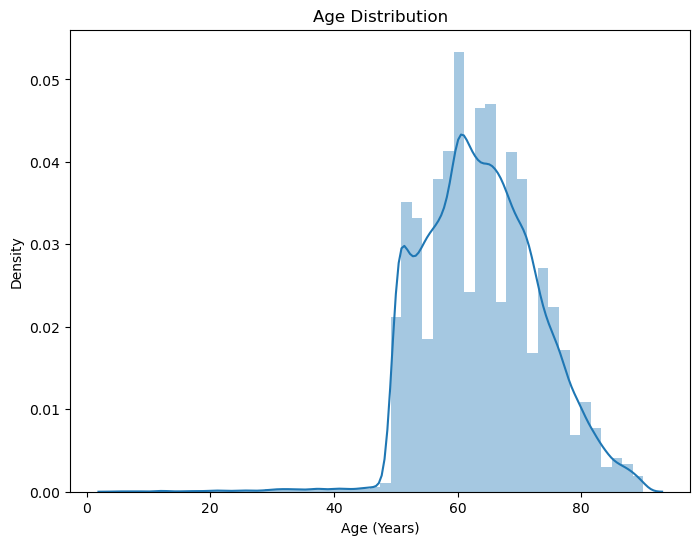

In [8]:
# Distplot
plt.figure(figsize=(8, 6))
sns.distplot(df['AGE_YRS'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

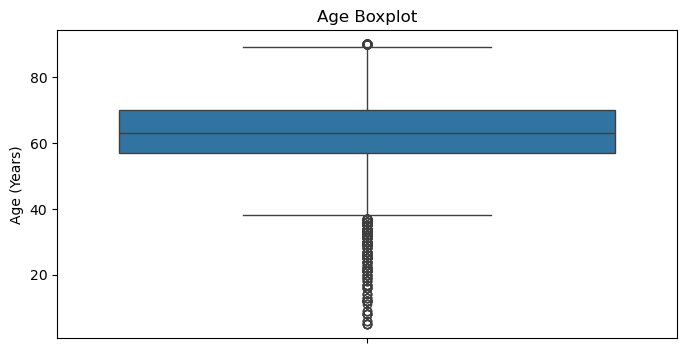

In [9]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['AGE_YRS'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()

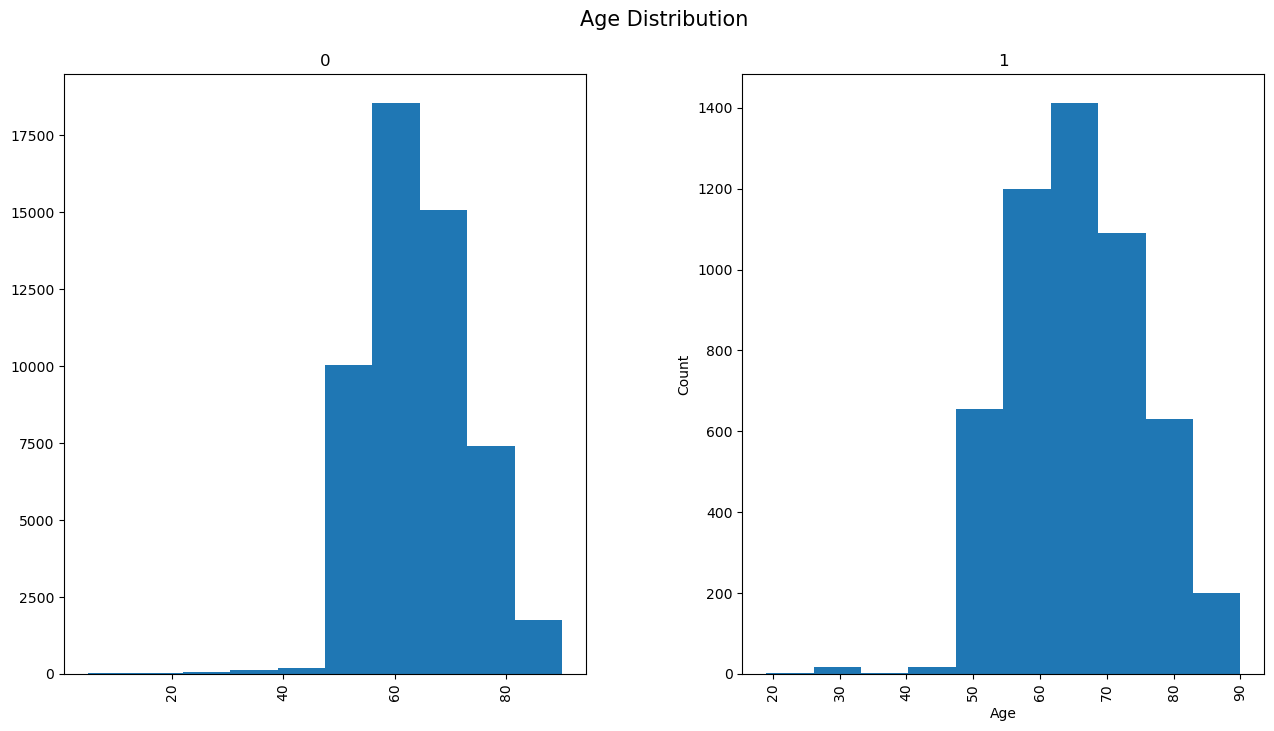

In [10]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['SERIOUS'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);

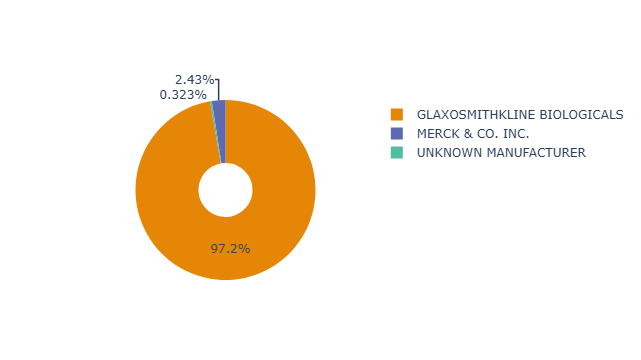

<Figure size 1500x800 with 0 Axes>

In [11]:
plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = [
                      'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)'])])
fig.show()

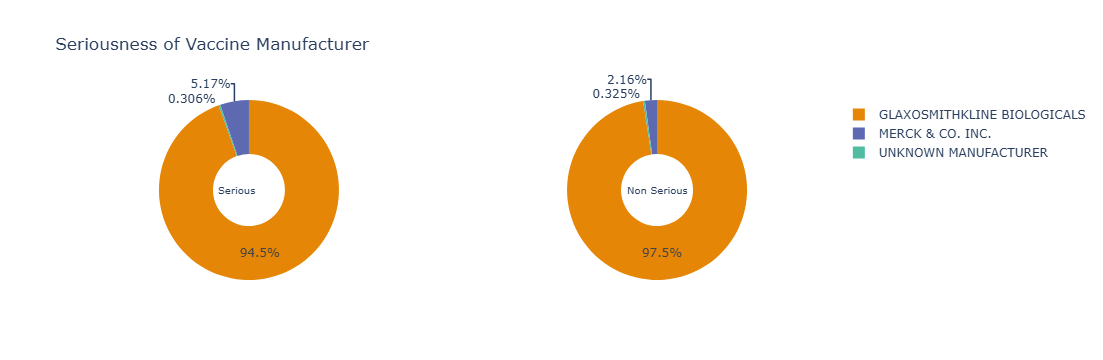

In [12]:
labels = df['VAX_MANU'].value_counts().index
values1 = df[df['SERIOUS'] == 1].VAX_MANU.value_counts().values
values2 = df[df['SERIOUS'] == 0].VAX_MANU.value_counts().values

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [13]:
# As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

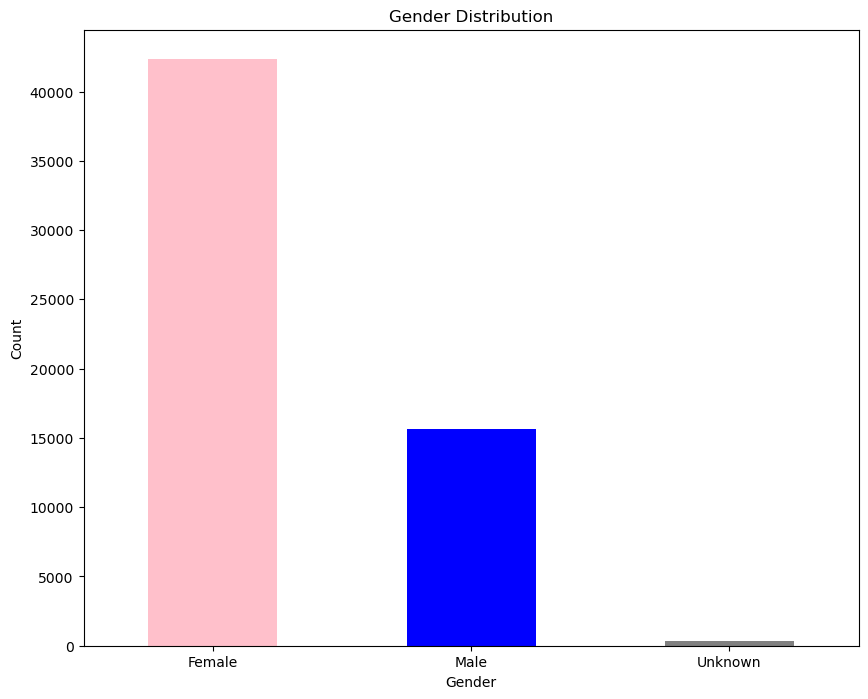

In [14]:
gender_mapping = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['Gender'] = df['SEX'].map(gender_mapping)

plt.figure(figsize=(10,8))
route = df['Gender'].value_counts()

# Define colors for each gender category
colors = {'Female': 'pink', 'Male': 'blue', 'Unknown': 'gray'}

# Plot the bars with specific colors
route.plot(kind='bar', title='Gender Distribution', color=[colors[gender] for gender in route.index])

plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

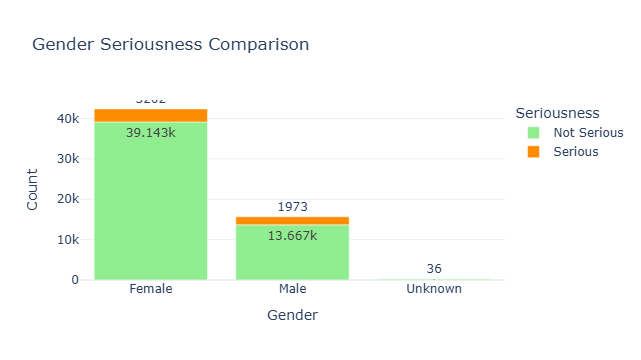

In [15]:
gender_serious = (df.groupby(['SEX', 'SERIOUS']).size()
                  .sort_values(ascending=False)
                  .reset_index(name='count'))

# Define mappings
map_dict = {0: "Female", 1: "Male", 2: "Unknown"}
map_dict_s = {0: "Not Serious", 1: "Serious"}

# Apply mappings
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["SERIOUS"] = gender_serious["SERIOUS"].map(map_dict_s)

# New color scheme
new_colors = {'Serious': 'darkorange', 'Not Serious': 'lightgreen'}

# Create the bar plot with new colors
fig = px.bar(gender_serious, x="SEX", y="count", color="SERIOUS", 
             title="Gender Seriousness Comparison",
             text_auto=True,
             color_discrete_map=new_colors)

# Update layout for better visualization
fig.update_layout(
    template="plotly_white",
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Seriousness"
)
fig.show()

In [16]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [17]:
age_serious = df[['AGE_YRS', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
age_serious["SERIOUS"] = age_serious["SERIOUS"].map(map_dict_s)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)
age_serious['AGE_CATEGORY'] = categories

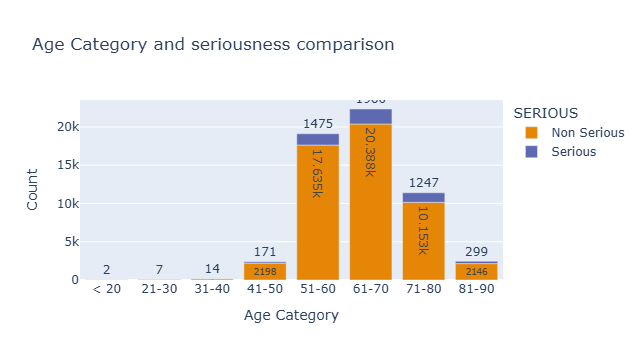

In [18]:
age_serious_group = (age_serious.groupby(['AGE_CATEGORY', 'SERIOUS']).size() 
   .reset_index(name='count'))

# Sort the DataFrame by AGE_CATEGORY
age_serious_group['AGE_CATEGORY'] = pd.Categorical(age_serious_group['AGE_CATEGORY'], categories=group, ordered=True)
age_serious_group = age_serious_group.sort_values('AGE_CATEGORY')

# Create the plot
fig = px.bar(age_serious_group, x="AGE_CATEGORY", y="count", color="SERIOUS", 
             text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

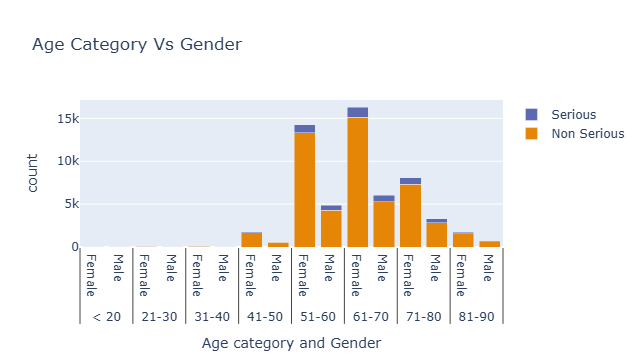

In [19]:
age_serious_sex = df[['AGE_YRS','SEX', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["SERIOUS"] = age_serious_sex["SERIOUS"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)
bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['AGE_CATEGORY'] = categories
age_serious_sex1 = (age_serious_sex.groupby(['AGE_CATEGORY','SEX', 'SERIOUS']).size()  
   .reset_index(name='count'))

fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(age_serious_sex1.SERIOUS.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.SERIOUS == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [20]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['AGE_CATEGORY'] = categories
subset_df

AGE_YRS     SEX      DIED                     VAX_MANU AGE_CATEGORY
0         50.0  Female  No Death             MERCK & CO. INC.        41-50
1         60.0  Female  No Death             MERCK & CO. INC.        51-60
2         60.0  Female  No Death             MERCK & CO. INC.        51-60
3         61.0  Female  No Death             MERCK & CO. INC.        61-70
4         61.0  Female  No Death             MERCK & CO. INC.        61-70
...        ...     ...       ...                          ...          ...
58980     59.0  Female  No Death  GLAXOSMITHKLINE BIOLOGICALS        51-60
58981     78.0    Male  No Death  GLAXOSMITHKLINE BIOLOGICALS        71-80
58982     52.0  Female  No Death  GLAXOSMITHKLINE BIOLOGICALS        51-60
58983     77.0  Female  No Death  GLAXOSMITHKLINE BIOLOGICALS        71-80
58984     63.0  Female  No Death  GLAXOSMITHKLINE BIOLOGICALS        61-70

[57985 rows x 5 columns]

In [21]:
subset_df1 = (subset_df.groupby(['AGE_CATEGORY','SEX', 'DIED']).size()  
   .reset_index(name='count'))

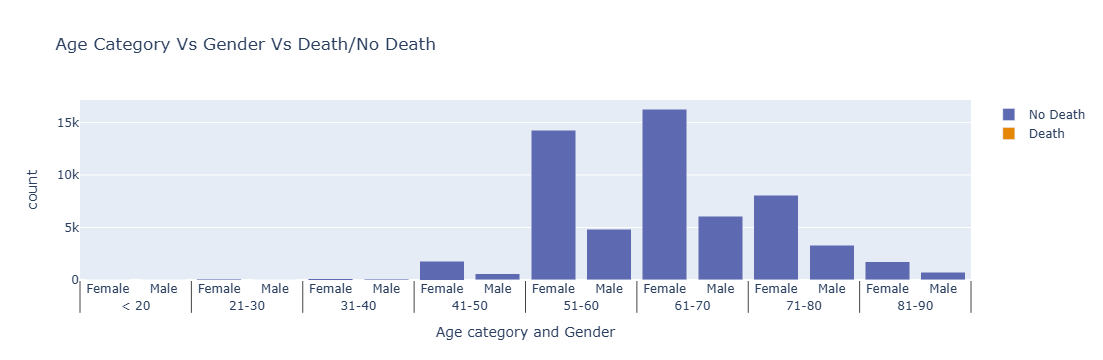

In [22]:
fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [23]:
sub = subset_df[(subset_df["DIED"] == 'Death')]
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [24]:
sub

DIED                     VAX_MANU  count
0  Death  GLAXOSMITHKLINE BIOLOGICALS     91
1  Death             MERCK & CO. INC.      5

In [25]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))
sub1 = sub1.rename(columns={"count":"totalcount"})
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)
sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100


sub1

VAX_MANU  totalcount  count  Percentage
0  GLAXOSMITHKLINE BIOLOGICALS       56594     91        0.16
1             MERCK & CO. INC.        1391      5        0.36

In [26]:
subset_death = df[(df["DIED"] == 1)]
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)

subset_death

VAERS_ID                 SYMPTOM1                  SYMPTOM2  \
964      737792            HERPES ZOSTER                 INFECTION   
1655     742892               CHEST PAIN              SUDDEN DEATH   
1752     743343                    COUGH                     DEATH   
1761     743447                    DEATH                             
3938     751040                 ACIDOSIS       ACUTE KIDNEY INJURY   
...         ...                      ...                       ...   
56778   2756217                    DEATH  HAEMORRHAGE INTRACRANIAL   
57269   2766545  GUILLAIN-BARRE SYNDROME           LABORATORY TEST   
57600   2772615                   CHILLS                     DEATH   
58118   2777510                DIZZINESS             HYPERHIDROSIS   
58327   2781043                    DEATH                             

                            SYMPTOM3             SYMPTOM4  \
964    VARICELLA VIRUS TEST POSITIVE                        
1655                                                        
1752                        DYSPNOEA            SINUSITIS   
1761                                                        
3938                       ANION GAP  ATRIAL FIBRILLATION   
...                              ...                  ...   
56778       PLATELET COUNT DECREASED     THROMBOCYTOPENIA   
57269                                                       
57600                                                       
58118                                                       
58327                                                       

                                     SYMPTOM5  \
964                                             
1655                                            
1752                                            
1761                                            
3938   BLOOD CREATINE PHOSPHOKINASE INCREASED   
...                                       ...   
56778                                           
57269                                           
57600                                           
58118                                           
58327                                           

                                                Symptoms  
964    HERPES ZOSTER,INFECTION,VARICELLA VIRUS TEST P...  
1655                       CHEST PAIN,SUDDEN DEATH, , ,   
1752                    COUGH,DEATH,DYSPNOEA,SINUSITIS,   
1761                                       DEATH, , , ,   
3938   ACIDOSIS,ACUTE KIDNEY INJURY,ANION GAP,ATRIAL ...  
...                                                  ...  
56778  DEATH,HAEMORRHAGE INTRACRANIAL,PLATELET COUNT ...  
57269      GUILLAIN-BARRE SYNDROME,LABORATORY TEST, , ,   
57600                                 CHILLS,DEATH, , ,   
58118                      DIZZINESS,HYPERHIDROSIS, , ,   
58327                                      DEATH, , , ,   

[96 rows x 7 columns]

In [27]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_sym_id = df_all_sym.assign(Symptoms=df_all_sym.Symptoms.str.split(','))
df_sym1 = df_sym_id.explode('Symptoms')

In [28]:
df_sym1

VAERS_ID                       Symptoms
0     737792                  HERPES ZOSTER
0     737792                      INFECTION
0     737792  VARICELLA VIRUS TEST POSITIVE
0     737792                               
0     737792                               
..       ...                            ...
54   2781043                          DEATH
54   2781043                               
54   2781043                               
54   2781043                               
54   2781043                               

[480 rows x 2 columns]

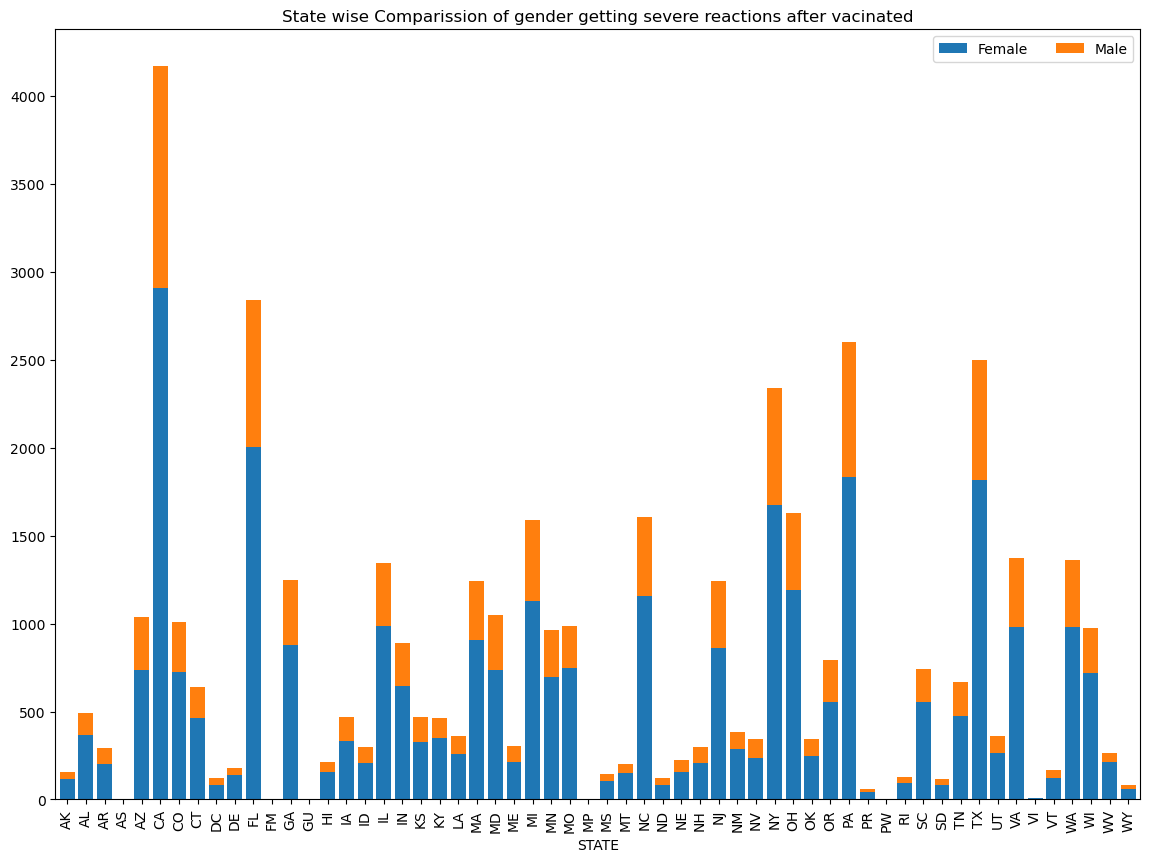

In [29]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','SERIOUS']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

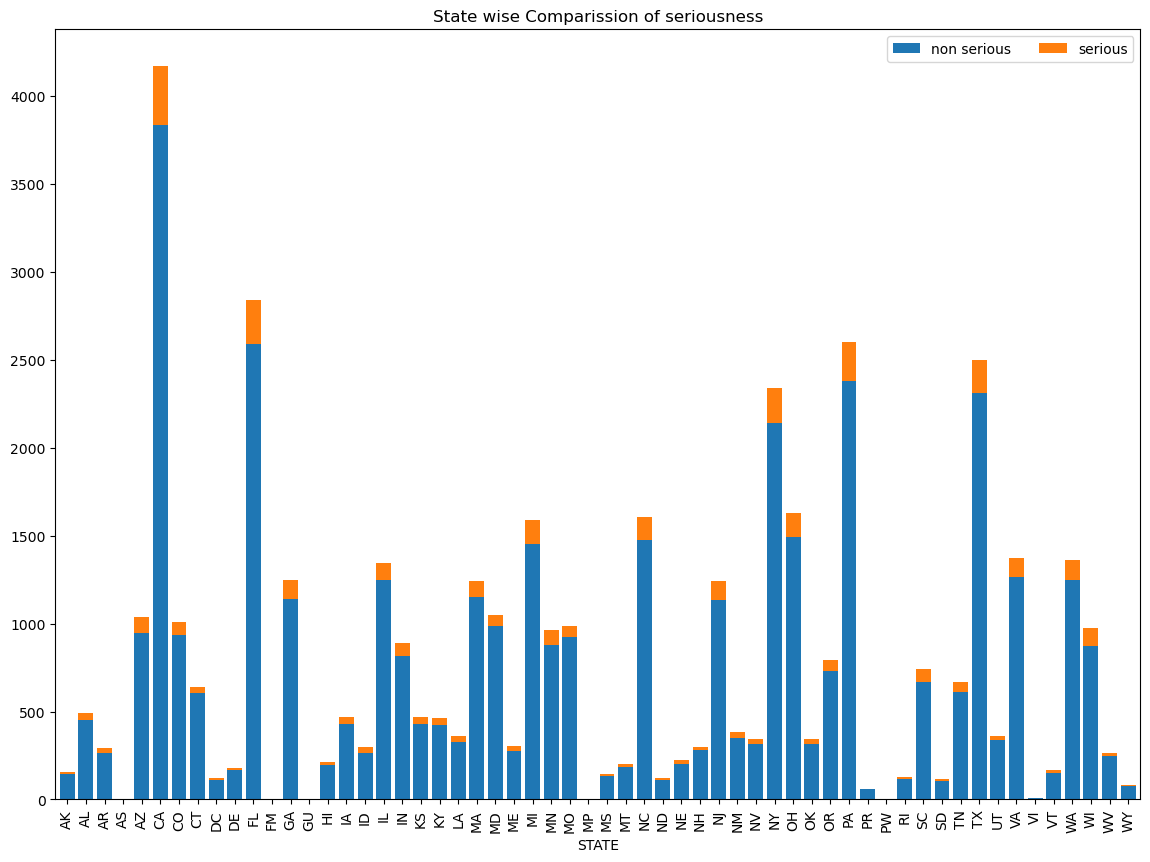

In [30]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SERIOUS).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [31]:
df_allergies = df.filter(['VAERS_ID','ALLERGIES','SERIOUS'], axis=1)
df_allergies.head()

VAERS_ID                ALLERGIES  SERIOUS
0    701253  LINZES TRAMADOL VALTREX        0
1    701263                      NKA        0
2    701308       NO KNOWN ALLERGIES        0
3    702367                   MANGOS        0
4    702367                   MANGOS        0

In [32]:
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.split())
df_allergies.head()

VAERS_ID                    ALLERGIES  SERIOUS
0    701253  [linzes, tramadol, valtrex]        0
1    701263                        [nka]        0
2    701308       [no, known, allergies]        0
3    702367                     [mangos]        0
4    702367                     [mangos]        0

In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_allergies.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


VAERS_ID                  ALLERGIES  SERIOUS
0    701253  [linz, tramadol, valtrex]        0
1    701263                      [nka]        0
2    701308           [known, allergi]        0
3    702367                    [mango]        0
4    702367                    [mango]        0

In [34]:
df_allergies.shape

(57985, 3)

In [35]:
df_allergies = df_allergies.explode('ALLERGIES', ignore_index=True)

df_allergies.head(10)

VAERS_ID ALLERGIES  SERIOUS
0    701253      linz        0
1    701253  tramadol        0
2    701253   valtrex        0
3    701263       nka        0
4    701308     known        0
5    701308   allergi        0
6    702367     mango        0
7    702367     mango        0
8    702379       NaN        0
9    702381       NaN        0

In [36]:
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
penicillin       4854
sulfa            4663
allergi          3260
known            2617
codein           2258
                 ... 
pce                 1
erythrmycin         1
pheonothiazin       1
necessit            1
adhatoda            1
Name: count, Length: 5351, dtype: int64

In [37]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_allergies.ALLERGIES.value_counts()
df_allergies = df_allergies[df_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
penicillin        4854
sulfa             4663
allergi           3260
known             2617
codein            2258
                  ... 
nitrofurantoin     106
ba                 105
opioid             105
see                104
corn               101
Name: count, Length: 144, dtype: int64

In [38]:
df_allergies = df_allergies.drop(df_allergies[df_allergies.ALLERGIES.isin(["nan","past","updat","allerg","codein",
                                                                                                   "none","comment","document","drug",
                                                                                                   "vaccin","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn","ba"])].index)
df_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42004 entries, 1 to 124623
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VAERS_ID   42004 non-null  int64 
 1   ALLERGIES  42004 non-null  object
 2   SERIOUS    42004 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


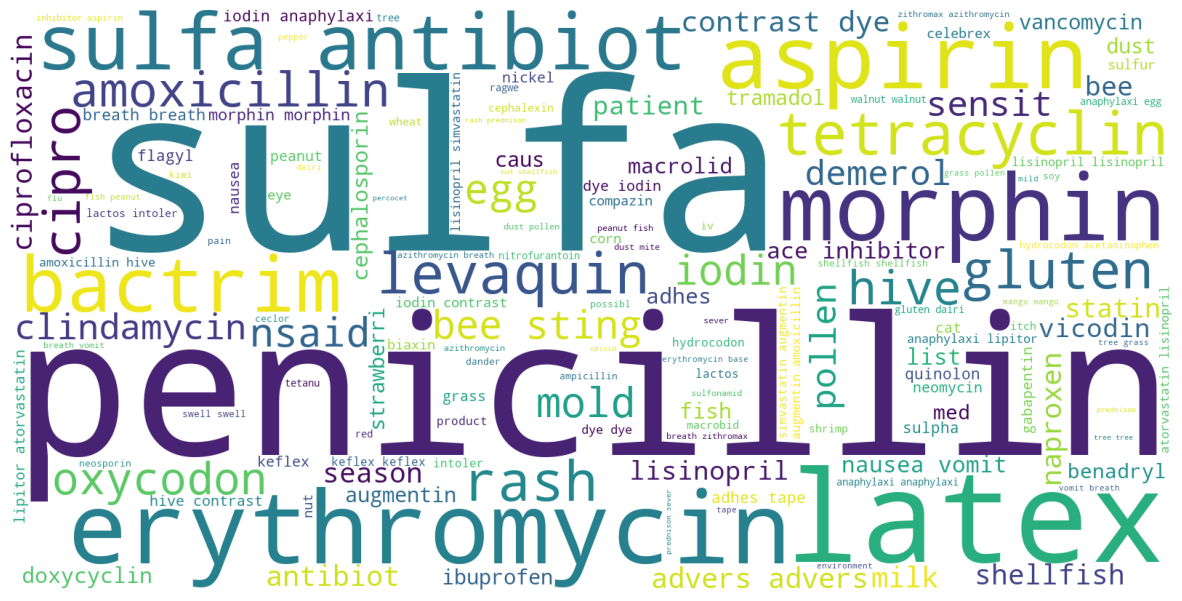

In [39]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

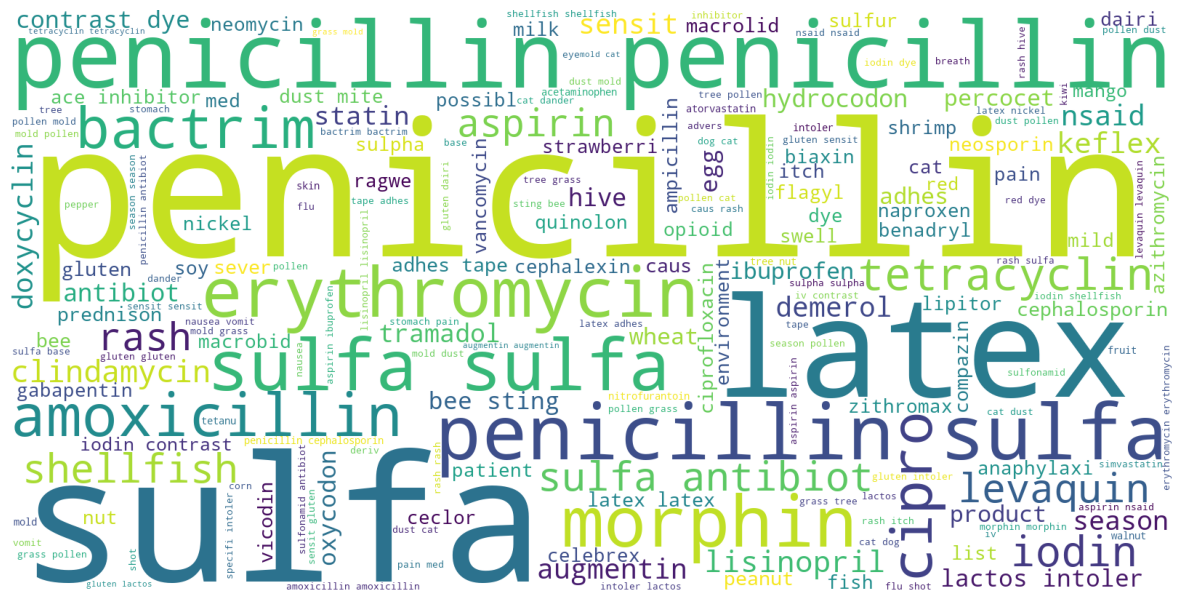

In [40]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 0]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57985 entries, 0 to 58984
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      57985 non-null  int64  
 1   STATE         57985 non-null  object 
 2   AGE_YRS       57985 non-null  float64
 3   SEX           57985 non-null  int64  
 4   SYMPTOM_TEXT  57985 non-null  object 
 5   DIED          57985 non-null  int64  
 6   L_THREAT      57985 non-null  int64  
 7   HOSPITAL      57985 non-null  int64  
 8   HOSPDAYS      57985 non-null  float64
 9   DISABLE       57985 non-null  int64  
 10  RECOVD        57985 non-null  int64  
 11  VAX_DATE      57985 non-null  object 
 12  ONSET_DATE    57985 non-null  object 
 13  NUMDAYS       57985 non-null  int64  
 14  OTHER_MEDS    57985 non-null  object 
 15  CUR_ILL       57985 non-null  object 
 16  HISTORY       57985 non-null  object 
 17  BIRTH_DEFECT  57985 non-null  int64  
 18  ALLERGIES     57985 non-null  o

In [42]:
df.drop(columns=['VAERS_ID','STATE','VAX_DATE','ONSET_DATE','NUMDAYS','VAX_NAME','Gender'],inplace=True)

In [43]:
df_varzos_ML = df

In [44]:
df_varzos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57985 entries, 0 to 58984
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE_YRS       57985 non-null  float64
 1   SEX           57985 non-null  int64  
 2   SYMPTOM_TEXT  57985 non-null  object 
 3   DIED          57985 non-null  int64  
 4   L_THREAT      57985 non-null  int64  
 5   HOSPITAL      57985 non-null  int64  
 6   HOSPDAYS      57985 non-null  float64
 7   DISABLE       57985 non-null  int64  
 8   RECOVD        57985 non-null  int64  
 9   OTHER_MEDS    57985 non-null  object 
 10  CUR_ILL       57985 non-null  object 
 11  HISTORY       57985 non-null  object 
 12  BIRTH_DEFECT  57985 non-null  int64  
 13  ALLERGIES     57985 non-null  object 
 14  VAX_MANU      57985 non-null  object 
 15  SYMPTOM1      57985 non-null  object 
 16  SYMPTOM2      57985 non-null  object 
 17  SYMPTOM3      57985 non-null  object 
 18  SYMPTOM4      57985 non-null  o

In [45]:
df_varzos_ML.head()

AGE_YRS  SEX                                       SYMPTOM_TEXT  DIED  \
0     50.0    0  THE PATIENT GOT THE ZOSTAVAX VACCINE PER PROTO...     0   
1     60.0    0  PATIENT REPORTED REDNESS AND SWELLING AT FIRST...     0   
2     60.0    0  PATIENT EXPERIENCED LARGE SWELLING IN THE UPPE...     0   
3     61.0    0  DEVELOPED SHINGLES YEARS LATER SYMPTOMS RASH A...     0   
4     61.0    0  DEVELOPED SHINGLES YEARS LATER SYMPTOMS RASH A...     0   

   L_THREAT  HOSPITAL  HOSPDAYS  DISABLE  RECOVD  \
0         0         0       0.0        0       2   
1         0         0       0.0        0       2   
2         0         0       0.0        0       0   
3         0         0       0.0        0       0   
4         0         0       0.0        0       0   

                                          OTHER_MEDS  ...  \
0               CYMBALTA ALDACTONE PRILOSEC ATENOLOL  ...   
1             SYNTHROID CEPHALEXIN ALPRAZOLAM CELEXA  ...   
2  PATIENT REPORTS TAKING METFORMIN AND INSULIN A...  ...   
3  METOPROLOL LISINOPRIL WITH HCTZ ATORVASTATIN D...  ...   
4  METOPROLOL LISINOPRIL WITH HCTZ ATORVASTATIN D...  ...   

                                             HISTORY BIRTH_DEFECT  \
0                           HIGH BLOOD PRESSURE GERD            0   
1                                                NKA            0   
2                                           DIABETES            0   
3  IBS D CORONARY ARTERY DISEASE ATHEROSCLEROSIS ...            0   
4  IBS D CORONARY ARTERY DISEASE ATHEROSCLEROSIS ...            0   

                 ALLERGIES          VAX_MANU                    SYMPTOM1  \
0  LINZES TRAMADOL VALTREX  MERCK & CO. INC.                  CELLULITIS   
1                      NKA  MERCK & CO. INC.                    ERYTHEMA   
2       NO KNOWN ALLERGIES  MERCK & CO. INC.         INJECTION SITE RASH   
3                   MANGOS  MERCK & CO. INC.          BLOOD COUNT NORMAL   
4                   MANGOS  MERCK & CO. INC.  RENAL FUNCTION TEST NORMAL   

                  SYMPTOM2                    SYMPTOM3  \
0      INJECTION SITE RASH       INJECTION SITE WARMTH   
1                     RASH                   SKIN WARM   
2  INJECTION SITE SWELLING                               
3            HERPES ZOSTER  LIVER FUNCTION TEST NORMAL   
4    URINE ANALYSIS NORMAL                               

                         SYMPTOM4 SYMPTOM5 SERIOUS  
0                                                0  
1                        SWELLING                0  
2                                                0  
3  METABOLIC FUNCTION TEST NORMAL     RASH       0  
4                                                0  

[5 rows x 21 columns]

In [46]:
df_varzos_ML.to_csv('C:/Users/chand/Downloads/606/varzos_ML.csv', index=False)

In [47]:
df_varzos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57985 entries, 0 to 58984
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE_YRS       57985 non-null  float64
 1   SEX           57985 non-null  int64  
 2   SYMPTOM_TEXT  57985 non-null  object 
 3   DIED          57985 non-null  int64  
 4   L_THREAT      57985 non-null  int64  
 5   HOSPITAL      57985 non-null  int64  
 6   HOSPDAYS      57985 non-null  float64
 7   DISABLE       57985 non-null  int64  
 8   RECOVD        57985 non-null  int64  
 9   OTHER_MEDS    57985 non-null  object 
 10  CUR_ILL       57985 non-null  object 
 11  HISTORY       57985 non-null  object 
 12  BIRTH_DEFECT  57985 non-null  int64  
 13  ALLERGIES     57985 non-null  object 
 14  VAX_MANU      57985 non-null  object 
 15  SYMPTOM1      57985 non-null  object 
 16  SYMPTOM2      57985 non-null  object 
 17  SYMPTOM3      57985 non-null  object 
 18  SYMPTOM4      57985 non-null  o